In [81]:
#importando as bibliotecas necessárias para o experimento:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [82]:
import redesneuraiscin.utils as utils

In [84]:
#Os datasets para o ensemble:
test = pd.read_csv("data/testDefault", sep="\t")
X_train, Y_train, X_val, Y_val, X_test, Y_test = utils.datasets_split()

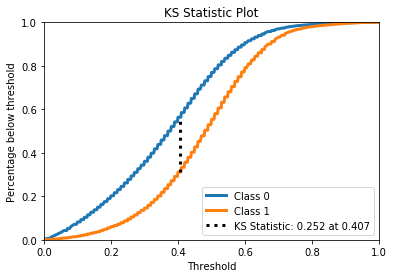


Accuracy:         0.6038
Recall:           0.4462
Precision:        0.6706
F1:               0.5358
AUROC:            0.6713
AUPR:             0.6469


In [85]:
#Random Forest com 100 estimadores
rf_clf = RandomForestClassifier(n_estimators=100)  # Modifique aqui os hyperparâmetros
rf_clf.fit(X_train, Y_train)
rf_pred_class = rf_clf.predict(X_val)
rf_pred_scores = rf_clf.predict_proba(X_val)
accuracy, recall, precision, f1, auroc, aupr = utils.compute_performance_metrics(Y_val, rf_pred_class, rf_pred_scores)
utils.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

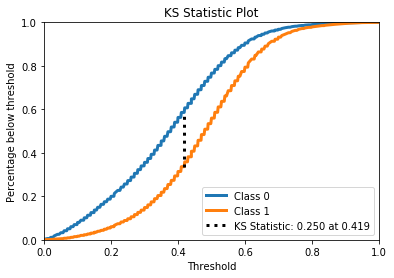


Accuracy:         0.5995
Recall:           0.4404
Precision:        0.6651
F1:               0.5299
AUROC:            0.6669
AUPR:             0.6419


In [86]:
rf_pred_class = rf_clf.predict(X_test)
rf_pred_scores = rf_clf.predict_proba(X_test)
accuracy, recall, precision, f1, auroc, aupr = utils.compute_performance_metrics(Y_test, rf_pred_class, rf_pred_scores)
utils.print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

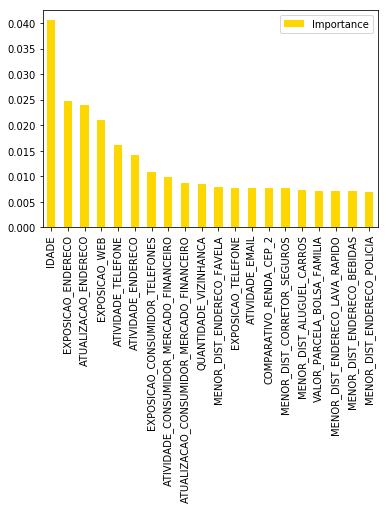

In [90]:
#Visualizando as features mais importantes
feat_importances = pd.DataFrame(rf_clf.feature_importances_, index=test.iloc[:, 2:-2].columns, 
                                columns=['Importance']).sort_values(by='Importance', 
                                                                    ascending=False)
feat_importances.head(20).plot.bar(color='gold')